# Introduction to Machine Learning

## Final Project - Spring 2022

## Classification of Art Work Dataset

### Aakarsha V. Rao

### April 27th, 2022

# Import Modules

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import seaborn as sns; sns.set_theme()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Read Input Files

In [2]:
X_train = np.array(pd.read_csv("./extracted_features.csv", header=None))
y_train = np.array(pd.read_csv("./labels.csv", header=None).iloc[:,-1])
X_test = np.array(pd.read_csv("./blind_test_data.csv", header=None))
raw_images = np.array(pd.read_csv("./raw_images.csv", header=None))

# Data Normalization with Standard Scaler

In [3]:
start = time.time()
std_scaler = StandardScaler()
std_scaler.fit(X_train) # Fit training data
X_train_scaled = std_scaler.transform(X_train)  # Transform training data
end = time.time()
time_elapsed = end - start
print("Time elapsed = ", time_elapsed, "seconds")
print()

Time elapsed =  0.006088972091674805 seconds



In [4]:
start = time.time()
k_svm = SVC()
parameters = {"C": [1.0], "kernel":['rbf'], "gamma":['scale']} # using default parameters for cross-validation    
clf_k_svm = GridSearchCV(k_svm, parameters, cv=4, return_train_score=True, verbose=4)
clf_k_svm.fit(X_train_scaled, y_train)
print("Optimal parameter values: {}".format(clf_k_svm.best_params_))
print("Optimal validation score: {:.4f}%".format(100*clf_k_svm.best_score_))
end = time.time()
time_elapsed = end - start
print()
print("Time elapsed for cross-validation using Standard scaler preprocessed data = ", time_elapsed, "s")

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.970, test=0.850) total time=   0.3s
[CV 2/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.976, test=0.877) total time=   0.2s
[CV 3/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.973, test=0.895) total time=   0.3s
[CV 4/4] END C=1.0, gamma=scale, kernel=rbf;, score=(train=0.970, test=0.890) total time=   0.2s
Optimal parameter values: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Optimal validation score: 87.8378%

Time elapsed for cross-validation using Standard scaler preprocessed data =  2.844856023788452 s


In [5]:
start = time.time()
std_scaler = StandardScaler()
std_scaler.fit(X_test)  # Fit testing data
X_test_scaled = std_scaler.transform(X_test)   # Transform testing data
end = time.time()
time_elapsed = end - start
print("Time elapsed = ", time_elapsed, "s")

Time elapsed =  0.0009589195251464844 s


# Multi-Layered Perceptron (Neural Network)

## Pipelines and GridSearch with Standard Scaled data to arrive at optimal values of hyperparameters 

In [6]:
pipe_mlp = make_pipeline(StandardScaler(), MLPClassifier(max_iter=100000)) 
param_range = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1.0] 
mlp_layers = [(10,10), (50,50), (100,100)]
activation_func = ['logistic', 'tanh', 'relu']
param_grid = [{'mlpclassifier__alpha': param_range, 'mlpclassifier__hidden_layer_sizes': mlp_layers, 'mlpclassifier__activation': activation_func}]
gs_std = GridSearchCV(estimator=pipe_mlp, param_grid=param_grid, scoring='accuracy', cv=4, refit=True, verbose=4)
gs = gs_std.fit(X_train, y_train)  # Fit the entire train dataset after cross-validation
print()
print("Best cross-validation accuracy: ", gs_std.best_score_)
print("Best estimator is: ", gs_std.best_estimator_)
print("Best parameters: ", gs_std.best_params_)
#print(classification_report(y_test, y_pred, target_names=['Pierre-Auguste_Renoir','Raphael','Leonardo_da_Vinci','Sandro_Botticelli','Francisco_Goya','Vincent_van_Gogh','Pablo_Picasso','Albrecht_Durer','Others']))

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.796 total time=   7.3s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.786 total time=   8.1s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.793 total time=   7.2s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.807 total time=   7.5s
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.856 total time=   7.8s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.876 total time=   7.5s
[CV 3/4] END mlpclas

[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.868 total time=   8.3s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.901 total time=   9.1s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.888 total time=   8.2s
[CV 1/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.868 total time=   8.4s
[CV 2/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.877 total time=   8.9s
[CV 3/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.901 total time=   8.5s
[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=0.01, mlpcla

[CV 4/4] END mlpclassifier__activation=logistic, mlpclassifier__alpha=1.0, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.838 total time=   5.8s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.816 total time=   4.0s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.832 total time=   3.6s
[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.838 total time=   4.0s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.820 total time=   4.0s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.861 total time=   3.8s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_s

[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.892 total time=   4.1s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.908 total time=   3.9s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.867 total time=   3.6s
[CV 2/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.863 total time=   3.9s
[CV 3/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.894 total time=   4.9s
[CV 4/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.886 total time=   4.4s
[CV 1/4] END mlpclassifier__activation=tanh, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_size

[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.868 total time=   3.4s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.852 total time=   3.7s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.859 total time=   3.1s
[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.859 total time=   2.6s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.890 total time=   3.4s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes=(50, 50);, score=0.901 total time=   2.9s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=1e-06, mlpclassifier__hidden_layer_sizes

[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.881 total time=   3.4s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.901 total time=   3.3s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.01, mlpclassifier__hidden_layer_sizes=(100, 100);, score=0.906 total time=   2.4s
[CV 1/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.852 total time=   3.7s
[CV 2/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.838 total time=   2.3s
[CV 3/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=(10, 10);, score=0.861 total time=   3.0s
[CV 4/4] END mlpclassifier__activation=relu, mlpclassifier__alpha=0.05, mlpclassifier__hidden_layer_sizes=

## Prediction by MLP using Standard Scaled data

In [7]:
start_test = time.time()
mlp = MLPClassifier(max_iter=2000, activation='relu', alpha=0.5, hidden_layer_sizes=(100,100)) # using the optimal values from GridSearch and Pipelines
mlp.fit(X_train_scaled, y_train)
y_pred_test = mlp.predict(X_test_scaled)
#print('The test data set accuracy for alpha=1, activation=relu and hidden_layer_sizes=(100,100) is ', mlp.score(X_test_scaled, y_test))
end_test = time.time()
print('Time taken to test the model = ', end_test - start_test, 'seconds')

Time taken to test the model =  4.7298808097839355 seconds


## Writing the predictions by MLP into a csv file

In [8]:
a = y_pred_test
np.savetxt("Rao_Aakarsha2.csv", a, delimiter=",")

## Printing the prediction of a particular sample (Demo)

In [11]:
sample_idx = 44
categories = ['Pierre-Auguste_Renoir', 'Raphael', 'Leonardo_da_Vinci', 'Sandro_Botticelli', 'Francisco_Goya', 'Vincent_van_Gogh', 'Pablo_Picasso', 'Albrecht_Durer', 'Others']
print("The predicted category for sample index "+ str(sample_idx) +" is " + categories[y_pred_test[sample_idx]])

# Legend:
# 0:'Pierre-Auguste_Renoir',
# 1:'Raphael',
# 2:'Leonardo_da_Vinci',
# 3:'Sandro_Botticelli',
# 4:'Francisco_Goya',
# 5:'Vincent_van_Gogh',
# 6:'Pablo_Picasso',
# 7:'Albrecht_Durer',
# 8:'Others'

The predicted category for sample index 44 is Raphael


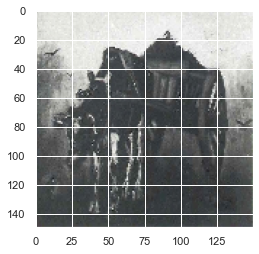

In [12]:
plt.imshow(raw_images[sample_idx].reshape(150,150,3))